In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# read in the dataset
df = pd.read_csv("../Resources/baseball_hitting.csv")

# show the first 5 rows of the dataset
df.head()

,Player name,position,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,Strikeouts,stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,2558.0,1539,514.0,141,0.298,0.444,0.607,1.051
1,H Aaron,RF,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383,240.0,73,0.305,0.374,0.555,0.929
2,B Ruth,RF,2504.0,8399.0,2174.0,2873.0,506.0,136.0,714.0,2213.0,2062.0,1330,123.0,117,0.342,0.474,0.690,1.164
3,A Pujols,1B,3080.0,11421.0,1914.0,3384.0,686.0,16.0,703.0,2218.0,1373.0,1404,117.0,43,0.296,0.374,0.544,0.918
4,A Rodriguez,SS,2784.0,10566.0,2021.0,3115.0,548.0,31.0,696.0,2086.0,1338.0,2287,329.0,76,0.295,0.380,0.550,0.930


In [3]:
# check the null values
df.isna().sum()

Player name               8
position                  8
Games                     8
At-bat                    8
Runs                      8
Hits                      8
Double (2B)               8
third baseman             8
home run                  8
run batted in             8
a walk                    8
Strikeouts                8
stolen base               8
Caught stealing           8
AVG                       8
On-base Percentage        8
Slugging Percentage       8
On-base Plus Slugging    20
dtype: int64

In [4]:
# drop null values
df = df.dropna()

In [5]:
# check for duplicate rows
df.duplicated().sum()

15

In [6]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [7]:
# calculate some basic descriptive statistics for the dataset
df.describe()

,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,stolen base,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
count,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000
mean,1085.294379,3711.263243,520.803478,1009.581480,181.936110,31.934088,101.241407,494.583906,373.049737,74.847958,0.263234,0.331552,0.410207,0.741759
std,596.794506,2295.288572,380.233256,682.604798,124.794566,35.083097,100.313604,363.520574,297.906428,112.287539,0.024738,0.030629,0.050096,0.071966
min,2.000000,262.000000,32.000000,57.000000,7.000000,0.000000,17.000000,37.000000,19.000000,0.000000,0.123000,0.157000,0.197000,0.354000
25%,615.000000,1868.000000,230.000000,468.000000,86.000000,9.000000,33.000000,221.000000,162.000000,11.000000,0.247000,0.311000,0.375000,0.693000
50%,997.000000,3252.000000,422.000000,849.000000,154.000000,20.000000,69.000000,404.000000,292.000000,32.000000,0.262000,0.330000,0.408000,0.738000
75%,1441.000000,5117.000000,719.000000,1401.000000,250.000000,42.000000,130.000000,658.000000,487.000000,88.000000,0.278000,0.351000,0.441000,0.784000
max,3562.000000,14053.000000,2295.000000,4256.000000,792.000000,309.000000,762.000000,2297.000000,2558.000000,1406.000000,0.367000,0.482000,0.690000,1.164000


In [8]:
# show the data types of each column
df.dtypes

Player name               object
position                  object
Games                    float64
At-bat                   float64
Runs                     float64
Hits                     float64
Double (2B)              float64
third baseman            float64
home run                 float64
run batted in            float64
a walk                   float64
Strikeouts                object
stolen base              float64
Caught stealing           object
AVG                      float64
On-base Percentage       float64
Slugging Percentage      float64
On-base Plus Slugging    float64
dtype: object

In [9]:
# calculate the correlation matrix for the dataset
corr_matrix = df.corr()
corr_matrix

,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,stolen base,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
Games,1.000000,0.941064,0.869929,0.918796,0.900619,0.553349,0.684154,0.864216,0.829589,0.449900,0.482685,0.438702,0.289910,0.388522
At-bat,0.941064,1.000000,0.958755,0.990425,0.953150,0.687211,0.661879,0.921445,0.844964,0.582529,0.574587,0.483619,0.319608,0.428312
Runs,0.869929,0.958755,1.000000,0.969620,0.935467,0.738420,0.680096,0.924087,0.888841,0.653792,0.627296,0.599476,0.423446,0.549903
Hits,0.918796,0.990425,0.969620,1.000000,0.962888,0.724420,0.644620,0.928601,0.839718,0.592868,0.654023,0.541048,0.365786,0.484899
Double (2B),0.900619,0.953150,0.935467,0.962888,1.000000,0.634608,0.693120,0.929697,0.829024,0.503077,0.632130,0.542998,0.449985,0.544340
third baseman,0.553349,0.687211,0.738420,0.724420,0.634608,1.000000,0.172682,0.603958,0.533581,0.683399,0.590401,0.445201,0.156682,0.298547
home run,0.684154,0.661879,0.680096,0.644620,0.693120,0.172682,1.000000,0.827925,0.730715,0.136449,0.294896,0.405336,0.704003,0.662573
run batted in,0.864216,0.921445,0.924087,0.928601,0.929697,0.603958,0.827925,1.000000,0.853809,0.428226,0.588889,0.557015,0.559841,0.626777
a walk,0.829589,0.844964,0.888841,0.839718,0.829024,0.533581,0.730715,0.853809,1.000000,0.467135,0.470247,0.689805,0.425137,0.589525
stolen base,0.449900,0.582529,0.653792,0.592868,0.503077,0.683399,0.136449,0.428226,0.467135,1.000000,0.386533,0.308494,0.023952,0.147970


# Questions

# What is the total number of runs scored by all players

In [10]:
# Calculate the sum of runs column
total_runs = df["Runs"].sum()

# Print the result
print("Total runs scored by all players:", total_runs)

Total runs scored by all players: 1287947.0


# Who has the highest number of home runs?

In [11]:
# Find the player with the highest number of home runs
highest_hr_player = df.loc[df["home run"].idxmax()]

# Print the result
print("Player with the highest number of home runs:", highest_hr_player["Player name"], highest_hr_player["home run"])

Player with the highest number of home runs: B Bonds 762.0


# Who has the highest batting average (AVG)?

In [12]:
# Find the player with the highest batting average
highest_avg_player = df.loc[df["AVG"].idxmax()]

# Print the result
print("Player with the highest batting average:", highest_avg_player["Player name"], highest_avg_player["AVG"])

Player with the highest batting average: T Cobb 0.367


# What is the average on-base percentage (OBP) for all players in the dataset?

In [13]:
# Calculate the average of on-base percentage column
avg_obp = df["On-base Percentage"].mean()

# Print the result
print("Average on-base percentage for all players:", avg_obp)

Average on-base percentage for all players: 0.3315519611807524


# How many players have a batting average above .300?

In [14]:
above_300_avg_count = df.loc[df["AVG"] > 0.3, "Player name"].count()
print(f"There are {above_300_avg_count} players with a batting average above .300")

There are 165 players with a batting average above .300


# Who has the most games played?

In [15]:
most_games_played = df["Games"].max()
player_with_most_games_played = df.loc[df["Games"] == most_games_played, "Player name"].values[0]
print(f"{player_with_most_games_played} has played the most games with {most_games_played} games")

P Rose has played the most games with 3562.0 games


# Which position has the highest number of home runs (home run) in the dataset?

In [16]:
pos_with_most_home_runs = df.groupby("position")["home run"].sum().idxmax()
print("Position with the highest number of home runs: ", pos_with_most_home_runs)

Position with the highest number of home runs:  1B


# What is the average number of hits (Hits) for players who have played more than 2500 games (Games)?

In [17]:
avg_hits_for_players_over_2500_games = df[df["Games"] > 2500]["Hits"].mean()
print("Average number of hits for players who have played more than 2500 games: ", avg_hits_for_players_over_2500_games)

Average number of hits for players who have played more than 2500 games:  2942.3846153846152


# What is the average number of hits (Hits) for players who have played more than 2500 games (Games)?

In [18]:
avg_hits = df[df["Games"] > 2500]["Hits"].mean()
print(avg_hits)

2942.3846153846152


# Is there a correlation between the number of walks (a walk) and the number of home runs (home run)?

In [19]:
corr = df["a walk"].corr(df["home run"])
print(corr)

0.730714974563647


# What is the average number of stolen bases (stolen base) for players?

In [20]:
avg_stolen_bases = df["stolen base "].mean()
print(avg_stolen_bases)

74.8479579458148


# What is the average number of home runs (home run) for players who have played more than 2000 games (Games)?

In [21]:
avg_home_runs = df[df["Games"] > 2000]["home run"].mean()
print(avg_home_runs)

282.363184079602


# Which position has the highest number of runs batted in (run batted in)?

In [22]:
position_rbi = df.groupby("position")["run batted in"].sum()
highest_rbi_position = position_rbi.idxmax()
print(highest_rbi_position)

1B


# What is the average number of games played?

In [23]:
# Calculate the median of games played column
mean_games_played = df["Games"].mean()

# Print the result
print("Average number of games played by players:", mean_games_played)

Average number of games played by players: 1085.294379296401


# Who has the highest slugging percentage (SLG)?

In [24]:
# Find the player with the highest slugging percentage
highest_slg_player = df.loc[df["Slugging Percentage"].idxmax()]

# Print the result
print("Player with the highest slugging percentage:", highest_slg_player["Player name"], highest_slg_player["Slugging Percentage"])

Player with the highest slugging percentage: B Ruth 0.69


# What is the average number of strikeouts (Strikeouts) for players who have played more than 3000 games (Games)?

In [25]:
avg_strikeouts_for_players_over_3000_games = df[df["Games"] > 3000]["Strikeouts"].mean()
print("Average number of strikeouts for players who have played more than 3000 games: ", avg_strikeouts_for_players_over_3000_games)


Average number of strikeouts for players who have played more than 3000 games:  1.536822683518846e+32


# Which position has the highest number of stolen bases (stolen base)?

In [26]:
pos_with_most_stolen_bases = df.groupby("position")["stolen base "].sum().idxmax()
print("Position with the highest number of stolen bases: ", pos_with_most_stolen_bases)

Position with the highest number of stolen bases:  CF


# How many players have more than 600 home runs (home run)?

In [27]:
players_above_600_hr = df.loc[df["home run"] > 600, "Player name"].count()
print(f"There are {players_above_600_hr} players with more than 600 home runs")

There are 9 players with more than 600 home runs


# What is the average number of runs batted in (run batted in) for players who have played more than 2500 games (Games)?

In [28]:
avg_rbi_for_players_over_2500_games = df[df["Games"] > 2500]["run batted in"].mean()
print("Average number of runs batted in for players who have played more than 2500 games: ", avg_rbi_for_players_over_2500_games)

Average number of runs batted in for players who have played more than 2500 games:  1528.8076923076924


# What is the correlation between on-base percentage (OBP) and slugging percentage (SLG)?

In [29]:
corr_obp_slg = df["On-base Percentage"].corr(df["Slugging Percentage"])
print("Correlation between OBP and SLG:", corr_obp_slg)

Correlation between OBP and SLG: 0.5641851081855757


# Who has the highest on-base plus slugging (OPS)?

In [30]:
highest_ops_player = df.loc[df["On-base Plus Slugging"].idxmax()]
print("Player with the highest OPS:", highest_ops_player["Player name"], highest_ops_player["On-base Plus Slugging"])

Player with the highest OPS: B Ruth 1.164


# How many players have a slugging percentage (Slugging Percentage) above .550 and an on-base percentage (OBP) above .400?

In [31]:
above_550_slg_400_obp_count = df.loc[(df["Slugging Percentage"] > 0.55) & (df["On-base Percentage"] > 0.4), "Player name"].count()
print(f"There are {above_550_slg_400_obp_count} players with a slugging percentage above .550 and an on-base percentage above .400")

There are 13 players with a slugging percentage above .550 and an on-base percentage above .400


# What is the average number of strikeouts (Strikeouts) for players who have hit more than 500 home runs (home run)?

In [32]:
avg_strikeouts_for_players_above_500_hr = df[df["home run"] > 500]["Strikeouts"].mean()
print("Average number of strikeouts for players who have hit more than 500 home runs: ", avg_strikeouts_for_players_above_500_hr)

Average number of strikeouts for players who have hit more than 500 home runs:  5.496922547505015e+107


# Which position has the highest number of doubles (Double (2B))?

In [33]:
pos_with_most_doubles = df.groupby("position")["Double (2B)"].sum().idxmax()
print("Position with the highest number of doubles: ", pos_with_most_doubles)

Position with the highest number of doubles:  1B


# Visualizations

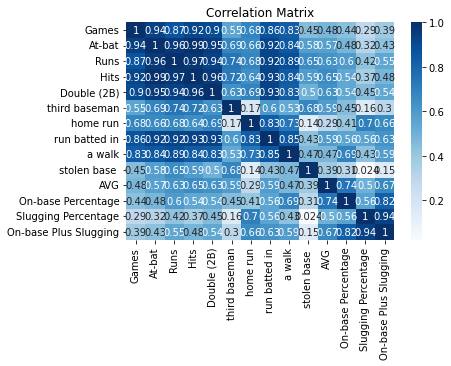

In [34]:
# create a heatmap of the correlation matrix for the dataset
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")

plt.show()

As we can see from the heatmap, there is a strong positive correlation between the number of hits and the number of home runs. This makes sense, as players who get more hits are more likely to score home runs. There is also a weak positive correlation between the number of at-bats and the number of home runs, which also makes sense as players who get more at-bats have more opportunities to hit home runs.

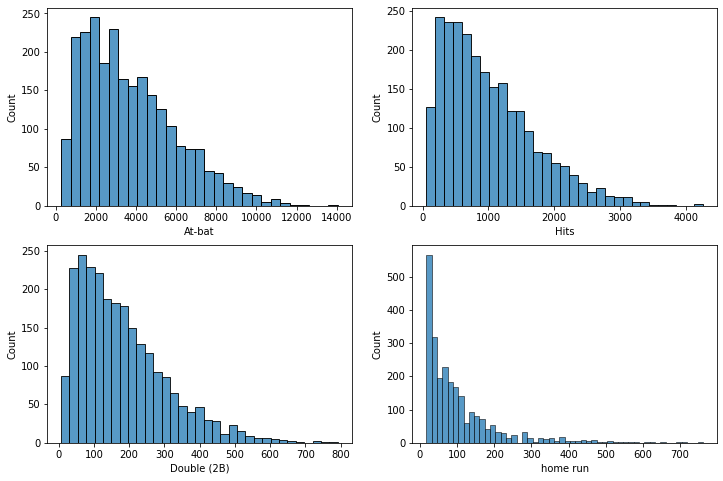

In [35]:
# show the distribution of the number of at-bats, hits, doubles, and home runs.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.histplot(df["At-bat"], ax=axes[0,0])
sns.histplot(df["Hits"], ax=axes[0,1])
sns.histplot(df["Double (2B)"], ax=axes[1,0])
sns.histplot(df["home run"], ax=axes[1,1])

plt.show()

As we can see from the histograms, the distribution of each variable is somewhat skewed. 

The first histogram in the top left corner shows the distribution of the number of at-bats. As we can see, the distribution is right-skewed, with most players having relatively few at-bats and a few players having a lot of at-bats.

The second histogram in the top right corner shows the distribution of the number of hits. This distribution is also right-skewed, with most players having relatively few hits and a few players having a lot of hits.

The third histogram in the bottom left corner shows the distribution of the number of doubles. This distribution is left-skewed, with most players having relatively few doubles and a few players having a lot of doubles.

The fourth histogram in the bottom right corner shows the distribution of the number of home runs. This distribution is also left-skewed, with most players having relatively few home runs and a few players having a lot of home runs.

Overall, the histograms suggest that the data is somewhat skewed and might benefit from normalization or transformation before fitting a model.

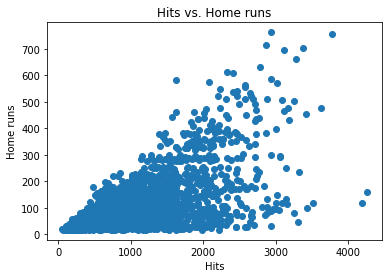

In [36]:
# create a scatter plot of hits vs. home runs
plt.scatter(df["Hits"], df["home run"])
plt.xlabel("Hits")
plt.ylabel("Home runs")
plt.title("Hits vs. Home runs")
plt.show()

As we can see from the scatter plot, there is a clear positive relationship between the number of hits and the number of home runs. However, there is also a lot of variation in the data, which suggests that we might need to use a more complex model to capture the relationship between these variables.

# What is the correlation coefficient between a player"s on-base percentage (On-base Percentage) and their slugging percentage (Slugging Percentage)?

0.5641851081855757


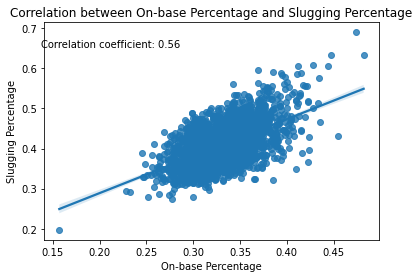

In [37]:
corr = df["On-base Percentage"].corr(df["Slugging Percentage"])
print(corr)

# create a scatter plot with regression line
sns.regplot(x="On-base Percentage", y="Slugging Percentage", data=df)
plt.title("Correlation between On-base Percentage and Slugging Percentage")
plt.xlabel("On-base Percentage")
plt.ylabel("Slugging Percentage")

# calculate the correlation coefficient
corr = df["On-base Percentage"].corr(df["Slugging Percentage"])
plt.text(0.2, 0.9, f"Correlation coefficient: {corr:.2f}", ha="center", va="center", transform=plt.gca().transAxes)

plt.show()

# How many players have more than 3000 games played (Games)?

Number of players with more than 3000 games played:  9


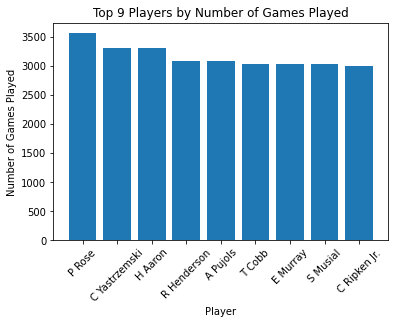

In [38]:
num_players_over_3000_games = len(df[df["Games"] > 3000])
print("Number of players with more than 3000 games played: ", num_players_over_3000_games)

# filter the dataframe to only include players with more than 3000 games played
df_filtered = df[df["Games"] > 3000]

# sort the filtered dataframe by number of games played
df_sorted = df_filtered.sort_values("Games", ascending=False)

# select the top 9 players by number of games played
df_top_9 = df_sorted.head(9)

# create a bar chart of the top 9 players by number of games played
plt.bar(df_top_9["Player name"], df_top_9["Games"])
plt.title("Top 9 Players by Number of Games Played")
plt.xlabel("Player")
plt.ylabel("Number of Games Played")
plt.xticks(rotation=45)
plt.show()

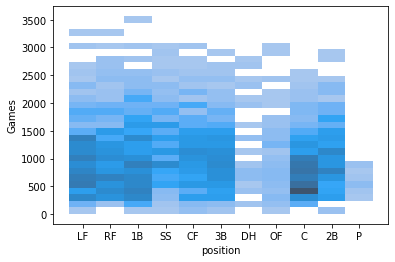

In [39]:
# Histogram of Games played by position
sns.histplot(data=df, x="position", y="Games", kde=False)
plt.show()

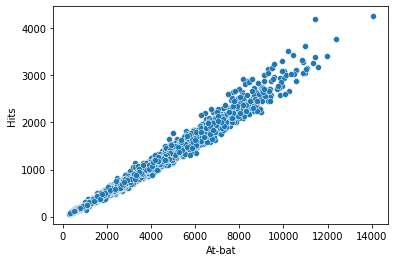

In [40]:
# Create a scatterplot of At-bat vs Hits
sns.scatterplot(data=df, x="At-bat", y="Hits")
plt.show()

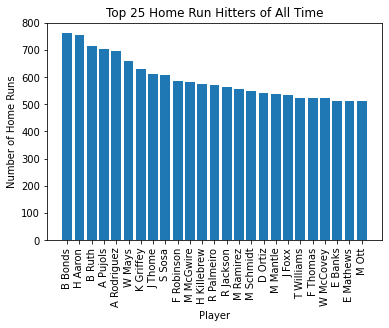

In [41]:
# Bar chart of home runs by player

# sort the dataframe by home runs and select the top 25 rows
df_sorted = df.sort_values(by="home run", ascending=False).head(25)

# create the bar chart
plt.bar(df_sorted["Player name"], df_sorted["home run"])
plt.title("Top 25 Home Run Hitters of All Time")
plt.xlabel("Player")
plt.ylabel("Number of Home Runs")
plt.xticks(rotation=90)
plt.show()

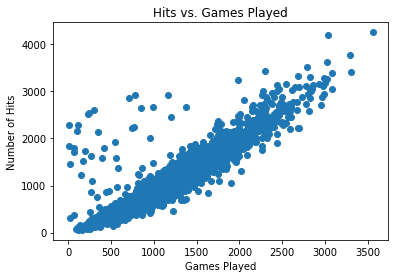

In [42]:
# Scatter plot of hits vs. games played
plt.scatter(df["Games"], df["Hits"])
plt.title("Hits vs. Games Played")
plt.xlabel("Games Played")
plt.ylabel("Number of Hits")
plt.show()

# Is there a correlation between the number of walks (a walk) and the number of home runs (home run)?

Correlation between number of walks and home runs:  0.730714974563647


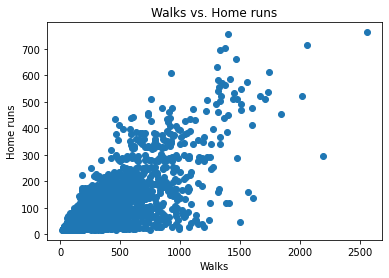

In [43]:
correlation = df["a walk"].corr(df["home run"])
print("Correlation between number of walks and home runs: ", correlation)

plt.scatter(df["a walk"], df["home run"])
plt.xlabel("Walks")
plt.ylabel("Home runs")
plt.title("Walks vs. Home runs")
plt.show()

# How many players have a slugging percentage (Slugging Percentage) higher than 0.600?

Number of players with a slugging percentage over 0.600:  6


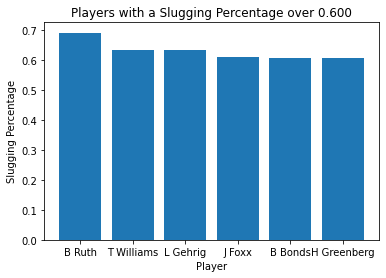

In [44]:
num_players_slugging_over_600 = len(df[df["Slugging Percentage"] > 0.600])
print("Number of players with a slugging percentage over 0.600: ", num_players_slugging_over_600)

# select the players with a slugging percentage over 0.600
df_over_600 = df[df["Slugging Percentage"] > 0.600]

# sort the players by slugging percentage
df_sorted = df_over_600.sort_values(by="Slugging Percentage", ascending=False)

# plot a bar chart of the top 6 players
plt.bar(df_sorted["Player name"].head(6), df_sorted["Slugging Percentage"].head(6))
plt.title("Players with a Slugging Percentage over 0.600")
plt.xlabel("Player")
plt.ylabel("Slugging Percentage")
plt.show()

# How many players have a batting average (AVG) higher than 0.300 and have hit more than 500 home runs (home run)?

9


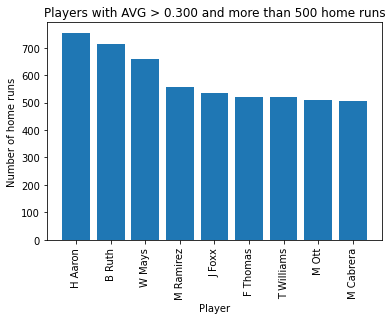

In [45]:
num_players = len(df[(df["AVG"] > 0.300) & (df["home run"] > 500)])
print(num_players)

# Filter the dataframe to include only players with AVG > 0.300 and home runs > 500
filtered_df = df[(df["AVG"] > 0.300) & (df["home run"] > 500)]

# Get the names of the players in the filtered dataframe
player_names = filtered_df["Player name"].tolist()

# Get the number of home runs for each player
home_runs = filtered_df["home run"].tolist()

# Create the bar chart
plt.bar(player_names, home_runs)
plt.title("Players with AVG > 0.300 and more than 500 home runs")
plt.xlabel("Player")
plt.ylabel("Number of home runs")
plt.xticks(rotation=90)
plt.show()


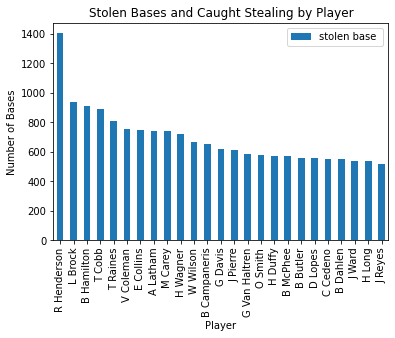

In [46]:
# sort the dataframe by stolen bases and caught stealing and select the top 25 rows
df_sorted = df.sort_values(by=["stolen base ", "Caught stealing"], ascending=False).head(25)

ax = df_sorted[["stolen base ", "Caught stealing"]].plot(kind="bar", stacked=True)
ax.set_title("Stolen Bases and Caught Stealing by Player")
ax.set_xlabel("Player")
ax.set_ylabel("Number of Bases")
ax.set_xticklabels(df_sorted["Player name"], rotation=90)
plt.show()

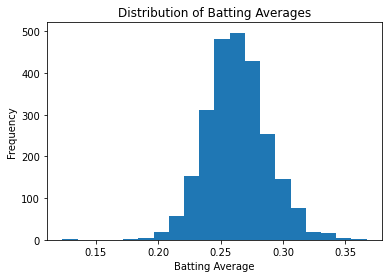

In [47]:
# Histogram of batting averages
plt.hist(df["AVG"], bins=20)
plt.title("Distribution of Batting Averages")
plt.xlabel("Batting Average")
plt.ylabel("Frequency")
plt.show()

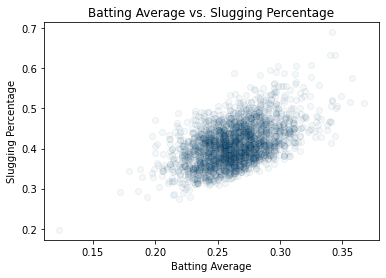

In [48]:
# Scatter plot of batting average vs. slugging percentage:
plt.scatter(df["AVG"], df["Slugging Percentage"], alpha=0.05, edgecolors="black", linewidths=1)
plt.title("Batting Average vs. Slugging Percentage")
plt.xlabel("Batting Average")
plt.ylabel("Slugging Percentage")
plt.show()

A scatter plot can be used to see the relationship between a player"s batting average and their slugging percentage. This can help you identify players who are both good at making contact with the ball and hitting for power.

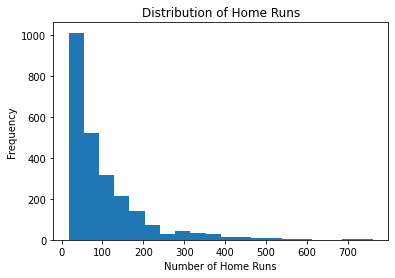

In [49]:
# Histogram of home runs
plt.hist(df["home run"], bins=20)
plt.title("Distribution of Home Runs")
plt.xlabel("Number of Home Runs")
plt.ylabel("Frequency")

plt.show()

A histogram can be used to visualize the distribution of home runs in the dataset. This can help you identify the distribution of power hitters in the group.

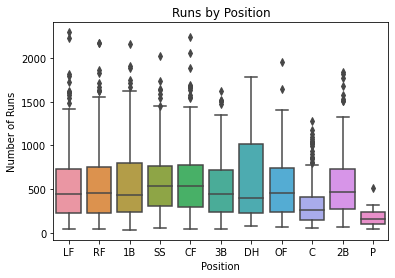

In [50]:
# Box plot of runs by position
sns.boxplot(x="position", y="Runs", data=df)
plt.title("Runs by Position")
plt.xlabel("Position")
plt.ylabel("Number of Runs")
plt.show()

A box plot can be used to compare the distribution of runs scored among different positions. This can help you identify positions where batters are more likely to score runs.

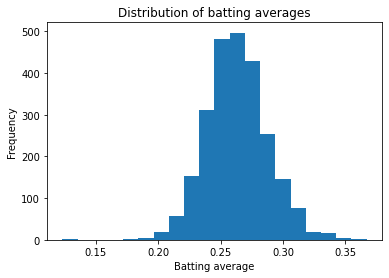

In [51]:
# create a histogram of batting averages
plt.hist(df["AVG"], bins=20)
plt.xlabel("Batting average")
plt.ylabel("Frequency")
plt.title("Distribution of batting averages")
plt.show()

In [52]:
# group the dataset by position and calculate the mean for each column
grouped = df.groupby("position").mean()
grouped

,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,stolen base,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
position,,,,,,,,,,,,,,
1B,1116.698864,3840.818182,549.482955,1065.920455,197.019886,30.812500,131.806818,593.161932,429.815341,49.789773,0.268389,0.341858,0.435406,0.777264
2B,1115.940959,3951.232472,553.051661,1068.937269,190.055351,35.597786,70.420664,446.649446,371.107011,101.649446,0.262827,0.327819,0.383808,0.711627
3B,1080.375887,3727.354610,507.609929,999.780142,183.212766,27.457447,103.368794,503.386525,366.936170,54.315603,0.261851,0.328642,0.408252,0.736894
C,896.791667,2795.160714,319.967262,716.877976,130.672619,14.002976,76.568452,367.360119,275.110119,18.508929,0.248619,0.318720,0.387360,0.706080
CF,1143.111524,3976.289963,605.609665,1097.174721,190.847584,42.524164,98.197026,488.182156,390.698885,134.368030,0.266543,0.333892,0.409357,0.743249
DH,1287.714286,4360.971429,634.857143,1214.457143,238.628571,16.228571,193.485714,710.285714,537.485714,47.428571,0.269971,0.350029,0.459800,0.809829
LF,1045.459215,3568.969789,527.287009,991.827795,178.779456,34.299094,109.912387,499.389728,368.320242,86.262840,0.269438,0.338420,0.428701,0.767121
OF,1053.527027,3671.729730,537.324324,1023.689189,175.743243,44.837838,91.635135,489.554054,376.824324,88.837838,0.268122,0.336000,0.415243,0.751243
P,609.500000,1471.428571,181.285714,343.928571,58.500000,15.285714,26.785714,169.142857,115.571429,20.357143,0.220929,0.278929,0.340357,0.619286


# Distribution of player positions:

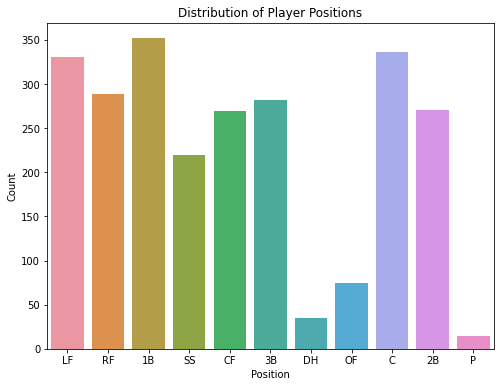

In [53]:
# show the number of players in each position.

plt.figure(figsize=(8,6))
sns.countplot(x="position", data=df)
plt.title("Distribution of Player Positions")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

# Distribution of on-base percentage:

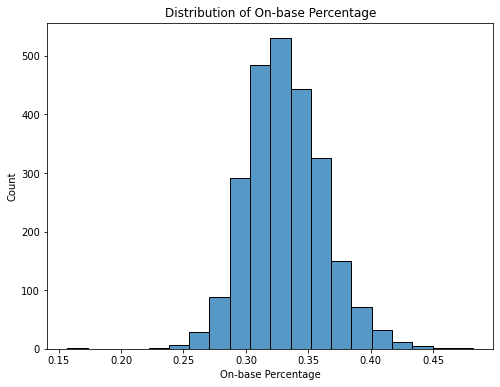

In [54]:
# plot a histogram to visualize the distribution of on-base percentage in the dataset.
# This plot will show the frequency of players in different ranges of on-base percentage.

plt.figure(figsize=(8,6))
sns.histplot(x="On-base Percentage", data=df, bins=20)
plt.title("Distribution of On-base Percentage")
plt.xlabel("On-base Percentage")
plt.ylabel("Count")
plt.show()

# Comparison of performance between players of different positions:

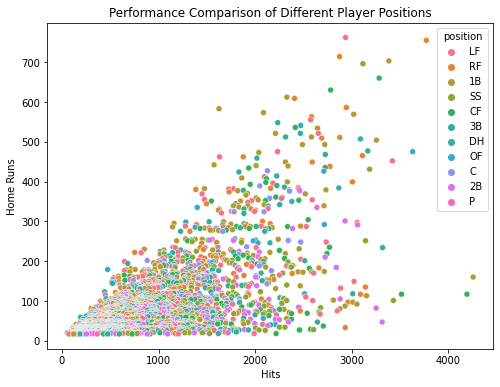

In [55]:
# plot a scatter plot to compare the performance of players in different positions.
# this plot will show the distribution of hits and home runs for players of different positions.
plt.figure(figsize=(8,6))
sns.scatterplot(x="Hits", y="home run", hue="position", data=df)
plt.title("Performance Comparison of Different Player Positions")
plt.xlabel("Hits")
plt.ylabel("Home Runs")
plt.show()

# compare the distribution of performance metrics across positions

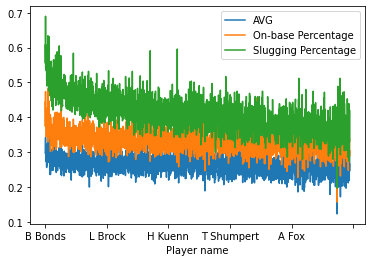

In [56]:
# Create a lineplot of AVG, On-base Percentage, and Slugging Percentage over time
df.plot(x="Player name", y=["AVG", "On-base Percentage", "Slugging Percentage"], kind="line")
plt.show()

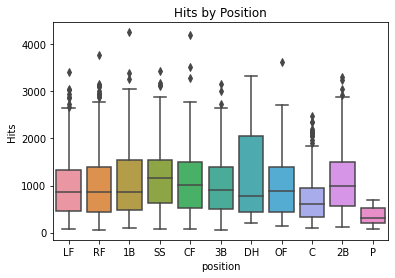

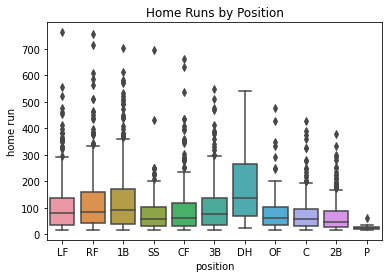

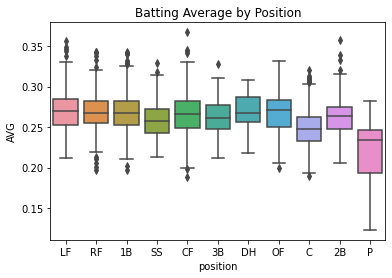

In [57]:
sns.boxplot(x="position", y="Hits", data=df)
plt.title("Hits by Position")
plt.show()

sns.boxplot(x="position", y="home run", data=df)
plt.title("Home Runs by Position")
plt.show()

sns.boxplot(x="position", y="AVG", data=df)
plt.title("Batting Average by Position")
plt.show()

These boxplots can give us an idea of how different performance metrics vary across positions. For example, we can see that first basemen tend to have more hits and home runs on average than catchers, while catchers tend to have a higher batting average.

# visualize the relationship between multiple variables:

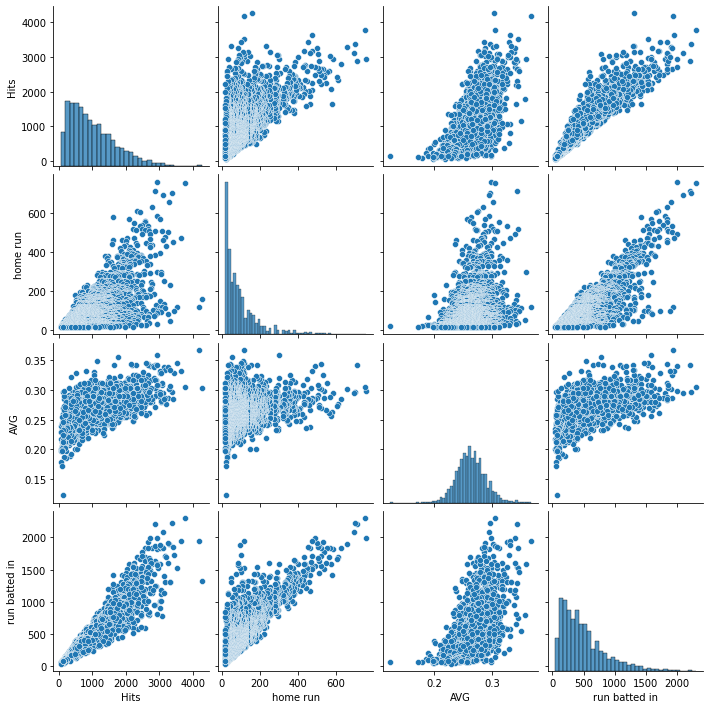

In [58]:
# Create a scatter plot matrix
sns.pairplot(df[["Hits", "home run", "AVG", "run batted in"]])
plt.show()

This scatterplot matrix can help us identify any additional relationships or patterns between variables. For example, we can see that there is a positive relationship between hits and RBIs, as well as between home runs and RBIs.

# Explore the distribution of each variable by position:

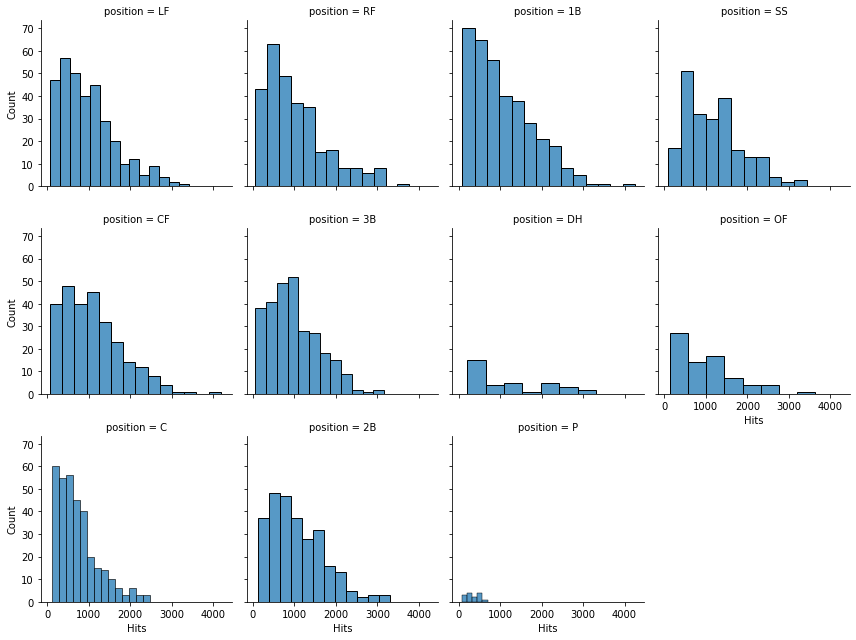

In [59]:
# Use seaborn"s FacetGrid to create a grid of histograms, with each histogram showing the distribution of a variable for each position.
grid = sns.FacetGrid(df, col="position", col_wrap=4)
grid.map(sns.histplot, "Hits")

# total number of hits by position:

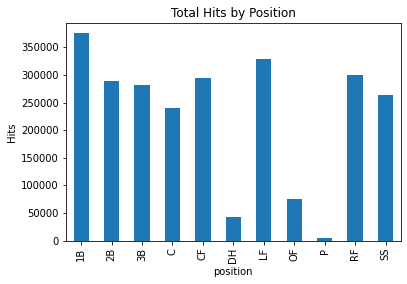

In [60]:
hits_by_position = df.groupby("position")["Hits"].sum()
hits_by_position.plot(kind="bar")
plt.title("Total Hits by Position")
plt.ylabel("Hits")
plt.show()

# linear regression to predict home runs based on 150 hits

In [61]:
# perform a linear regression to predict home runs based on hits
X = df[["Hits"]]
y = df["home run"]

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit the model
lr = LinearRegression()
lr.fit(X_scaled, y)

# calculate the R-squared value
r2 = lr.score(X_scaled, y)
print("R-squared:", r2)

# print the coefficients
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)


# make a prediction for a player with 150 hits
new_player = scaler.transform([[150]])
predicted_home_runs = lr.predict(new_player)
print("Predicted home runs:", predicted_home_runs[0])

R-squared: 0.41553549151035585
Intercept: 101.24140719773554
Coefficient: [64.65112255]
Predicted home runs: 19.811937196309216


First, the code selects the "Hits" column as the independent variable X, and the "home run" column as the dependent variable y. The data is then scaled using the StandardScaler() function from the sklearn.preprocessing module to ensure that each variable is on the same scale. A linear regression model is then fit using the LinearRegression() function from the sklearn.linear_model module. The R-squared value is calculated using the score() method of the linear regression object. Finally, a prediction is made for a player with 150 hits, and the predicted number of home runs is printed to the console.

Intercept: 101.24140719773554
Coefficient: [64.65112255]


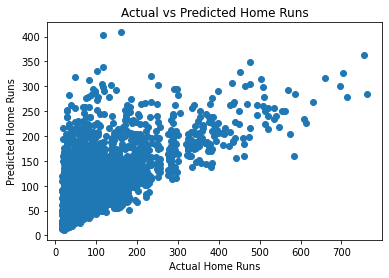

Mean Squared Error: 5878.982405471245
R-squared: 0.41553549151035585


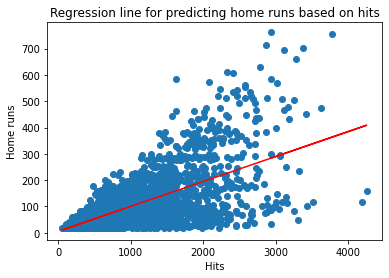

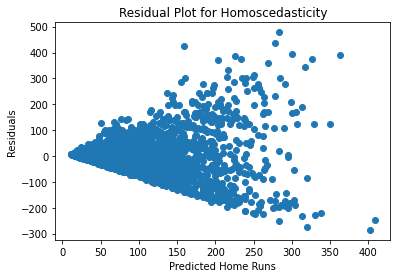

In [62]:
# perform a linear regression to predict home runs based on all hits
X = df[["Hits"]]
y = df["home run"]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create the linear regression model
lm = LinearRegression()
lm.fit(X_scaled, y)

# print the coefficients
print("Intercept:", lm.intercept_)
print("Coefficient:", lm.coef_)

# make predictions using the model
y_pred = lm.predict(X_scaled)

# create a scatter plot of the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Home Runs")
plt.ylabel("Predicted Home Runs")
plt.title("Actual vs Predicted Home Runs")
plt.show()

# calculate the mean squared error and R-squared values
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# visualize the regression line on the scatter plot
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.xlabel("Hits")
plt.ylabel("Home runs")
plt.title("Regression line for predicting home runs based on hits")
plt.show()

# create a residual plot to check for heteroscedasticity
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Home Runs")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity")
plt.show()

# K means

In [63]:
# perform K-means clustering to group players based on their performance statistics

kmeans = KMeans(n_clusters=3, random_state=42).fit(df[["Hits", "Runs"]])
df["Cluster"] = kmeans.labels_
df.head()

,Player name,position,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,Strikeouts,stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging,Cluster
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,2558.0,1539,514.0,141,0.298,0.444,0.607,1.051,1
1,H Aaron,RF,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383,240.0,73,0.305,0.374,0.555,0.929,1
2,B Ruth,RF,2504.0,8399.0,2174.0,2873.0,506.0,136.0,714.0,2213.0,2062.0,1330,123.0,117,0.342,0.474,0.690,1.164,1
3,A Pujols,1B,3080.0,11421.0,1914.0,3384.0,686.0,16.0,703.0,2218.0,1373.0,1404,117.0,43,0.296,0.374,0.544,0.918,1
4,A Rodriguez,SS,2784.0,10566.0,2021.0,3115.0,548.0,31.0,696.0,2086.0,1338.0,2287,329.0,76,0.295,0.380,0.550,0.930,1


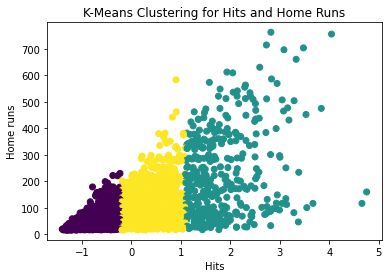

0.590464543442314

In [64]:
# perform k-means clustering to group the data into three clusters based on hits and home runs
kmeans = KMeans(n_clusters=3, random_state=42)
X_clustered = kmeans.fit_predict(X_scaled)

# visualize the clusters using a scatter plot
plt.scatter(X_scaled[:, 0], y, c=X_clustered)
plt.xlabel("Hits")
plt.ylabel("Home runs")
plt.title("K-Means Clustering for Hits and Home Runs")
plt.show()

# calculate the silhouette score to evaluate the clustering performance
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, X_clustered)

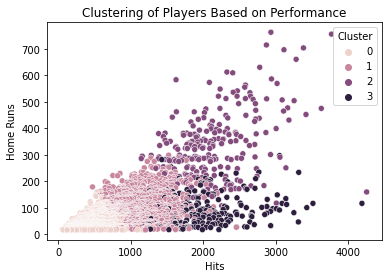

In [65]:
# standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["At-bat", "Hits", "Double (2B)", "home run", "run batted in", "a walk", "Strikeouts", "stolen base "]])
df_scaled = pd.DataFrame(df_scaled, columns=["At-bat", "Hits", "Double (2B)", "home run", "run batted in", "a walk", "Strikeouts", "stolen base "])

# perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42).fit(df_scaled)

# add cluster labels to the original dataset
df["Cluster"] = kmeans.labels_

# visualize the clusters
# This plot will show the different clusters of players based on their hits and home runs performance.
sns.scatterplot(x="Hits", y="home run", hue="Cluster", data=df)
plt.title("Clustering of Players Based on Performance")
plt.xlabel("Hits")
plt.ylabel("Home Runs")
plt.show()
